In [1]:
import pandas as pd

In [2]:
dtypes = {
    'ProductName': 'float32', 'EngineVersion': 'float32', 'AppVersion': 'float32', 'AvSigVersion': 'float32', 'IsBeta': 'float32', 'RtpStateBitfield': 'float32', 'IsSxsPassiveMode': 'float32', 'DefaultBrowsersIdentifier': 'float32', 'AVProductStatesIdentifier': 'float32', 'AVProductsInstalled': 'float32', 'AVProductsEnabled': 'float32', 'HasTpm': 'float32', 'CountryIdentifier': 'float32', 'CityIdentifier': 'float32', 'OrganizationIdentifier': 'float32', 'GeoNameIdentifier': 'float32', 'LocaleEnglishNameIdentifier': 'float32', 'Platform': 'float32', 'Processor': 'float32', 'OsVer': 'float32', 'OsBuild': 'float32', 'OsSuite': 'float32', 'OsPlatformSubRelease': 'float32', 'OsBuildLab': 'float32', 'SkuEdition': 'float32', 'IsProtected': 'float32', 'AutoSampleOptIn': 'float32', 'PuaMode': 'float32', 'SMode': 'float32', 'IeVerIdentifier': 'float32', 'SmartScreen': 'float32', 'Firewall': 'float32', 'UacLuaenable': 'float32', 'Census_MDC2FormFactor': 'float32', 'Census_DeviceFamily': 'float32', 'Census_OEMNameIdentifier': 'float32', 'Census_OEMModelIdentifier': 'float32', 'Census_ProcessorCoreCount': 'float32', 'Census_ProcessorManufacturerIdentifier': 'float32', 'Census_ProcessorModelIdentifier': 'float32', 'Census_ProcessorClass': 'float32', 'Census_PrimaryDiskTotalCapacity': 'float32', 'Census_PrimaryDiskTypeName': 'float32', 'Census_SystemVolumeTotalCapacity': 'float32', 'Census_HasOpticalDiskDrive': 'float32', 'Census_TotalPhysicalRAM': 'float32', 'Census_ChassisTypeName': 'float32', 'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'float32', 'Census_InternalPrimaryDisplayResolutionHorizontal': 'float32', 'Census_InternalPrimaryDisplayResolutionVertical': 'float32', 'Census_PowerPlatformRoleName': 'float32', 'Census_InternalBatteryType': 'float32', 'Census_InternalBatteryNumberOfCharges': 'float32', 'Census_OSVersion': 'float32', 'Census_OSArchitecture': 'float32', 'Census_OSBranch': 'float32', 'Census_OSBuildNumber': 'float32', 'Census_OSBuildRevision': 'float32', 'Census_OSEdition': 'float32', 'Census_OSSkuName': 'float32', 'Census_OSInstallTypeName': 'float32', 'Census_OSInstallLanguageIdentifier': 'float32', 'Census_OSUILocaleIdentifier': 'float32', 'Census_OSWUAutoUpdateOptionsName': 'float32', 'Census_IsPortableOperatingSystem': 'float32', 'Census_GenuineStateName': 'float32', 'Census_ActivationChannel': 'float32', 'Census_IsFlightingInternal': 'float32', 'Census_IsFlightsDisabled': 'float32', 'Census_FlightRing': 'float32', 'Census_ThresholdOptIn': 'float32', 'Census_FirmwareManufacturerIdentifier': 'float32', 'Census_FirmwareVersionIdentifier': 'float32', 'Census_IsSecureBootEnabled': 'float32', 'Census_IsWIMBootEnabled': 'float32', 'Census_IsVirtualDevice': 'float32', 'Census_IsTouchEnabled': 'float32', 'Census_IsPenCapable': 'float32', 'Census_IsAlwaysOnAlwaysConnectedCapable': 'float32', 'Wdft_IsGamer': 'float32', 'Wdft_RegionIdentifier': 'float32', 'HasDetections': 'int8'}

In [4]:
import helper_functions
import importlib
importlib.reload(helper_functions)

<module 'helper_functions' from '/Users/rishis/Desktop/School/ML/Project/refact/ML-project/helper_functions.py'>

In [3]:
train = pd.read_csv('/Users/rishis/Desktop/School/ML/Project/refact/ML-project/dataset/train_data_kaggle_processed.csv', dtype=dtypes)
test = pd.read_csv('/Users/rishis/Desktop/School/ML/Project/refact/ML-project/dataset/validation_data_kaggle_processed.csv', dtype=dtypes)

In [6]:

# Check memory usage before and after
print(f"Memory usage before optimization: {train.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Memory usage before optimization: {test.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Apply optimization
train = helper_functions.reduce_mem_usage(train)
test = helper_functions.reduce_mem_usage(test)

# Check memory usage before and after
print(f"Memory usage after optimization: {train.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Memory usage after optimization: {test.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Memory usage before optimization: 1967.09 MB
Memory usage before optimization: 491.77 MB
Mem. usage decreased to 891.66 Mb (54.7% reduction)
Mem. usage decreased to 222.91 Mb (54.7% reduction)
Memory usage after optimization: 891.66 MB
Memory usage after optimization: 222.91 MB


In [7]:
y_train = train['HasDetections']
X_train = train.drop(columns=['HasDetections'])
del train

y_val = test['HasDetections']
X_val = test.drop(columns=['HasDetections'])
del test

In [8]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [ ]:
model_xgb = XGBClassifier(n_estimators=200, random_state=42, use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
model_xgb.fit(X_train, y_train)

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  

In [ ]:
pd.set_option('display.max_rows', None)
# Retrieve feature importances
importances_xgb = model_xgb.feature_importances_
feat_importances_xgb = pd.Series(importances_xgb, index=X_train.columns).sort_values(ascending=False)

# Display top 10 feature importances
print(feat_importances_xgb.sort_values(ascending=False))
print(sum(feat_importances_xgb))

In [ ]:
model_xgb.fit(X_train, y_train)
labels = model_xgb.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, labels))
val_labels = model_xgb.predict(X_val)
print("Val Accuracy: ", accuracy_score(y_val, val_labels))

In [9]:
X_train = X_train.fillna(-1)
X_val = X_val.fillna(-1)

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset

In [11]:


# Convert to PyTorch tensors
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
# X_test_tensor = torch.tensor(X_val.values, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

# # Create datasets and data loaders
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# train_loader = DataLoader(train_dataset, batch_size=4096, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=4096, shuffle=False)

In [12]:

def create_model(input_dim):
    class MLP(nn.Module):
        def __init__(self, input_dim):
            super(MLP, self).__init__()
            
            self.model = nn.Sequential(
                nn.Linear(input_dim, 256), 
                nn.BatchNorm1d(256),
                nn.ReLU(),
                nn.Dropout(0.3),                            
                
                nn.Linear(256, 128),
                nn.BatchNorm1d(128),
                nn.ReLU(),
                nn.Dropout(0.3),

                nn.Linear(128, 64),
                nn.BatchNorm1d(64),
                nn.ReLU(),
                nn.Dropout(0.3),

                nn.Linear(64, 1) 
            )

        def forward(self, x):
            return self.model(x)

    simple_model = MLP(input_dim)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(simple_model.parameters(), weight_decay=1e-4,lr=0.0001)  
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

    return simple_model, criterion, optimizer, scheduler  


In [13]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
# Define PCA retention ratios
ratios = [1, 0.95, 0.90, 0.85, 0.80, 0.75, 0.7, 0.6, 0.5]

# Dictionary to store results
results = {
    'ratio': [],
    'num_features': [],
    'train_acc_pca': [],
    'test_acc_pca': [],
    'train_acc_lda': [],
    'test_acc_lda': []
}

total_features = X_train.shape[1]

# For each PCA ratio
for ratio in ratios:
    # Fit PCA
    num_features = int(total_features * ratio)
    pca = PCA(n_components=num_features)
    pca.fit(X_train)
    
    # Store number of components for this ratio
    results['ratio'].append(ratio)
    results['num_features'].append(num_features)
    
    # Get PCA feature importance
    pca_importance = np.sum(np.abs(pca.components_), axis=0)
    pca_features = X_train.columns[np.argsort(pca_importance)[-num_features:]]
    
    # Fit LDA and get feature importance
    lda = LDA()
    lda.fit(X_train, y_train)
    lda_importance = np.abs(lda.coef_[0])
    lda_features = X_train.columns[np.argsort(lda_importance)[-num_features:]]

    simple_model, criterion, optimizer, scheduler = create_model(num_features)
    
    # Train and evaluate using PCA-selected features
    # Create datasets and data loaders
    X_train_pca = X_train[pca_features]            # DataFrame of shape (N, m)
    X_val_pca  = X_val[pca_features]
    X_train_tensor_pca = torch.tensor(X_train_pca.values, dtype=torch.float32)
    X_val_tensor_pca = torch.tensor(X_val_pca.values, dtype=torch.float32)
    train_dataset_pca = TensorDataset(X_train_tensor_pca, y_train_tensor)
    test_dataset_pca = TensorDataset(X_val_tensor_pca, y_test_tensor)
    train_loader = DataLoader(train_dataset_pca, batch_size=4096, shuffle=True)
    test_loader = DataLoader(test_dataset_pca, batch_size=4096, shuffle=False)
    model_weights_pca, train_loss_pca, test_loss_pca, train_accuracy_pca, test_accuracy_pca, lrs_pca = helper_functions.train_and_evaluate_model(simple_model, criterion, optimizer, scheduler, train_loader, test_loader, 5)
    
    results['train_acc_pca'].append(train_accuracy_pca[-1])
    results['test_acc_pca'].append(test_accuracy_pca[-1])
    
    # Train and evaluate using LDA-selected features
    X_train_lda = X_train[lda_features]            # DataFrame of shape (N, m)
    X_val_lda  = X_val[lda_features]
    X_train_tensor_lda = torch.tensor(X_train_lda.values, dtype=torch.float32)
    X_val_tensor_lda = torch.tensor(X_val_lda.values, dtype=torch.float32)
    train_dataset_lda = TensorDataset(X_train_tensor_lda, y_train_tensor)
    test_dataset_lda = TensorDataset(X_val_tensor_lda, y_test_tensor)
    train_loader = DataLoader(train_dataset_lda, batch_size=4096, shuffle=True)
    test_loader = DataLoader(test_dataset_lda, batch_size=4096, shuffle=False)
    model_weights_lda, train_loss_lda, test_loss_lda, train_accuracy_lda, test_accuracy_lda, lrs_lda = helper_functions.train_and_evaluate_model(simple_model, criterion, optimizer, scheduler, train_loader, test_loader, 5)
    
    results['train_acc_lda'].append(train_accuracy_lda[-1])
    results['test_acc_lda'].append(test_accuracy_lda[-1])
    
    print(f"\nPCA Ratio: {ratio:.2f} (Top {num_features} features)")
    print(f"PCA - Train Accuracy: {results['train_acc_pca'][-1]:.4f}")
    print(f"PCA - Validation Accuracy: {results['test_acc_pca'][-1]:.4f}")
    print(f"LDA - Train Accuracy: {results['train_acc_lda'][-1]:.4f}")
    print(f"LDA - Validation Accuracy: {results['test_acc_lda'][-1]:.4f}")

In [23]:
ratios = [0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
for ratio in ratios:
    # Fit PCA
    num_features = int(total_features * ratio)
    pca = PCA(n_components=num_features)
    pca.fit(X_train)
    
    # Store number of components for this ratio
    results['ratio'].append(ratio)
    results['num_features'].append(num_features)
    
    # Get PCA feature importance
    pca_importance = np.sum(np.abs(pca.components_), axis=0)
    pca_features = X_train.columns[np.argsort(pca_importance)[-num_features:]]
    
    # Fit LDA and get feature importance
    lda = LDA()
    lda.fit(X_train, y_train)
    lda_importance = np.abs(lda.coef_[0])
    lda_features = X_train.columns[np.argsort(lda_importance)[-num_features:]]

    simple_model, criterion, optimizer, scheduler = create_model(num_features)
    
    # Train and evaluate using PCA-selected features
    # Create datasets and data loaders
    X_train_pca = X_train[pca_features]            # DataFrame of shape (N, m)
    X_val_pca  = X_val[pca_features]
    X_train_tensor_pca = torch.tensor(X_train_pca.values, dtype=torch.float32)
    X_val_tensor_pca = torch.tensor(X_val_pca.values, dtype=torch.float32)
    train_dataset_pca = TensorDataset(X_train_tensor_pca, y_train_tensor)
    test_dataset_pca = TensorDataset(X_val_tensor_pca, y_test_tensor)
    train_loader = DataLoader(train_dataset_pca, batch_size=4096, shuffle=True)
    test_loader = DataLoader(test_dataset_pca, batch_size=4096, shuffle=False)
    model_weights_pca, train_loss_pca, test_loss_pca, train_accuracy_pca, test_accuracy_pca, lrs_pca = helper_functions.train_and_evaluate_model(simple_model, criterion, optimizer, scheduler, train_loader, test_loader, 5)
    
    results['train_acc_pca'].append(train_accuracy_pca[-1])
    results['test_acc_pca'].append(test_accuracy_pca[-1])
    
    # Train and evaluate using LDA-selected features
    X_train_lda = X_train[lda_features]            # DataFrame of shape (N, m)
    X_val_lda  = X_val[lda_features]
    X_train_tensor_lda = torch.tensor(X_train_lda.values, dtype=torch.float32)
    X_val_tensor_lda = torch.tensor(X_val_lda.values, dtype=torch.float32)
    train_dataset_lda = TensorDataset(X_train_tensor_lda, y_train_tensor)
    test_dataset_lda = TensorDataset(X_val_tensor_lda, y_test_tensor)
    train_loader = DataLoader(train_dataset_lda, batch_size=4096, shuffle=True)
    test_loader = DataLoader(test_dataset_lda, batch_size=4096, shuffle=False)
    model_weights_lda, train_loss_lda, test_loss_lda, train_accuracy_lda, test_accuracy_lda, lrs_lda = helper_functions.train_and_evaluate_model(simple_model, criterion, optimizer, scheduler, train_loader, test_loader, 5)
    
    results['train_acc_lda'].append(train_accuracy_lda[-1])
    results['test_acc_lda'].append(test_accuracy_lda[-1])
    
    print(f"\nPCA Ratio: {ratio:.2f} (Top {num_features} features)")
    print(f"PCA - Train Accuracy: {results['train_acc_pca'][-1]:.4f}")
    print(f"PCA - Validation Accuracy: {results['test_acc_pca'][-1]:.4f}")
    print(f"LDA - Train Accuracy: {results['train_acc_lda'][-1]:.4f}")
    print(f"LDA - Validation Accuracy: {results['test_acc_lda'][-1]:.4f}")

Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 34.91it/s, acc=59.47%, loss=0.6664]


Epoch 1 Loss: 0.6693, Train Accuracy: 59.03%
Test Loss: 0.6521, Test Accuracy: 61.35%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 34.90it/s, acc=61.57%, loss=0.6557]


Epoch 2 Loss: 0.6516, Train Accuracy: 61.04%
Test Loss: 0.6384, Test Accuracy: 62.70%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.26it/s, acc=62.90%, loss=0.6278]


Epoch 3 Loss: 0.6420, Train Accuracy: 62.09%
Test Loss: 0.6339, Test Accuracy: 63.05%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.07it/s, acc=63.01%, loss=0.6330]


Epoch 4 Loss: 0.6374, Train Accuracy: 62.62%
Test Loss: 0.6313, Test Accuracy: 63.30%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.15it/s, acc=64.14%, loss=0.6244]


Epoch 5 Loss: 0.6349, Train Accuracy: 62.90%
Test Loss: 0.6298, Test Accuracy: 63.45%


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.55it/s, acc=62.39%, loss=0.6334]


Epoch 1 Loss: 0.6546, Train Accuracy: 60.90%
Test Loss: 0.6341, Test Accuracy: 62.99%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.18it/s, acc=62.85%, loss=0.6321]


Epoch 2 Loss: 0.6361, Train Accuracy: 62.83%
Test Loss: 0.6294, Test Accuracy: 63.51%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.75it/s, acc=62.03%, loss=0.6407]


Epoch 3 Loss: 0.6326, Train Accuracy: 63.21%
Test Loss: 0.6273, Test Accuracy: 63.73%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.51it/s, acc=62.54%, loss=0.6368]


Epoch 4 Loss: 0.6309, Train Accuracy: 63.41%
Test Loss: 0.6261, Test Accuracy: 63.87%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.69it/s, acc=65.78%, loss=0.6204]


Epoch 5 Loss: 0.6298, Train Accuracy: 63.54%
Test Loss: 0.6253, Test Accuracy: 63.97%

PCA Ratio: 0.70 (Top 45 features)
PCA - Train Accuracy: 0.6290
PCA - Validation Accuracy: 0.6345
LDA - Train Accuracy: 0.6354
LDA - Validation Accuracy: 0.6397


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.30it/s, acc=60.70%, loss=0.6547]


Epoch 1 Loss: 0.6680, Train Accuracy: 59.22%
Test Loss: 0.6508, Test Accuracy: 61.53%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.27it/s, acc=63.42%, loss=0.6298]


Epoch 2 Loss: 0.6504, Train Accuracy: 61.21%
Test Loss: 0.6376, Test Accuracy: 62.78%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.35it/s, acc=62.60%, loss=0.6392]


Epoch 3 Loss: 0.6412, Train Accuracy: 62.16%
Test Loss: 0.6335, Test Accuracy: 63.06%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.94it/s, acc=61.11%, loss=0.6408]


Epoch 4 Loss: 0.6371, Train Accuracy: 62.61%
Test Loss: 0.6313, Test Accuracy: 63.28%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.07it/s, acc=61.88%, loss=0.6405]


Epoch 5 Loss: 0.6348, Train Accuracy: 62.88%
Test Loss: 0.6299, Test Accuracy: 63.44%


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.39it/s, acc=61.26%, loss=0.6433]


Epoch 1 Loss: 0.6550, Train Accuracy: 60.85%
Test Loss: 0.6357, Test Accuracy: 63.02%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.53it/s, acc=62.19%, loss=0.6504]


Epoch 2 Loss: 0.6375, Train Accuracy: 62.76%
Test Loss: 0.6302, Test Accuracy: 63.48%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.33it/s, acc=62.39%, loss=0.6388]


Epoch 3 Loss: 0.6332, Train Accuracy: 63.19%
Test Loss: 0.6274, Test Accuracy: 63.71%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.09it/s, acc=60.13%, loss=0.6505]


Epoch 4 Loss: 0.6310, Train Accuracy: 63.40%
Test Loss: 0.6261, Test Accuracy: 63.89%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.34it/s, acc=64.19%, loss=0.6290]


Epoch 5 Loss: 0.6296, Train Accuracy: 63.55%
Test Loss: 0.6252, Test Accuracy: 63.99%

PCA Ratio: 0.65 (Top 42 features)
PCA - Train Accuracy: 0.6288
PCA - Validation Accuracy: 0.6344
LDA - Train Accuracy: 0.6355
LDA - Validation Accuracy: 0.6399


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.65it/s, acc=62.60%, loss=0.6566]


Epoch 1 Loss: 0.6713, Train Accuracy: 58.57%
Test Loss: 0.6535, Test Accuracy: 60.86%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.87it/s, acc=61.93%, loss=0.6386]


Epoch 2 Loss: 0.6539, Train Accuracy: 60.44%
Test Loss: 0.6417, Test Accuracy: 61.96%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.87it/s, acc=61.57%, loss=0.6431]


Epoch 3 Loss: 0.6451, Train Accuracy: 61.41%
Test Loss: 0.6378, Test Accuracy: 62.32%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 34.91it/s, acc=61.52%, loss=0.6440]


Epoch 4 Loss: 0.6410, Train Accuracy: 61.90%
Test Loss: 0.6354, Test Accuracy: 62.58%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.29it/s, acc=63.31%, loss=0.6327]


Epoch 5 Loss: 0.6386, Train Accuracy: 62.19%
Test Loss: 0.6336, Test Accuracy: 62.78%


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.51it/s, acc=62.13%, loss=0.6437]


Epoch 1 Loss: 0.6578, Train Accuracy: 60.60%
Test Loss: 0.6395, Test Accuracy: 62.66%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.53it/s, acc=62.24%, loss=0.6396]


Epoch 2 Loss: 0.6410, Train Accuracy: 62.39%
Test Loss: 0.6330, Test Accuracy: 63.24%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.54it/s, acc=62.80%, loss=0.6297]


Epoch 3 Loss: 0.6359, Train Accuracy: 62.90%
Test Loss: 0.6298, Test Accuracy: 63.45%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.43it/s, acc=64.24%, loss=0.6276]


Epoch 4 Loss: 0.6333, Train Accuracy: 63.14%
Test Loss: 0.6281, Test Accuracy: 63.63%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.41it/s, acc=65.98%, loss=0.6090]


Epoch 5 Loss: 0.6316, Train Accuracy: 63.31%
Test Loss: 0.6270, Test Accuracy: 63.76%

PCA Ratio: 0.60 (Top 39 features)
PCA - Train Accuracy: 0.6219
PCA - Validation Accuracy: 0.6278
LDA - Train Accuracy: 0.6331
LDA - Validation Accuracy: 0.6376


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.24it/s, acc=58.90%, loss=0.6688]


Epoch 1 Loss: 0.6719, Train Accuracy: 58.34%
Test Loss: 0.6546, Test Accuracy: 60.78%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.17it/s, acc=61.31%, loss=0.6458]


Epoch 2 Loss: 0.6552, Train Accuracy: 60.23%
Test Loss: 0.6437, Test Accuracy: 61.70%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.04it/s, acc=61.57%, loss=0.6474]


Epoch 3 Loss: 0.6469, Train Accuracy: 61.12%
Test Loss: 0.6399, Test Accuracy: 62.02%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.90it/s, acc=61.57%, loss=0.6359]


Epoch 4 Loss: 0.6430, Train Accuracy: 61.57%
Test Loss: 0.6377, Test Accuracy: 62.26%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.48it/s, acc=61.26%, loss=0.6461]


Epoch 5 Loss: 0.6409, Train Accuracy: 61.84%
Test Loss: 0.6364, Test Accuracy: 62.43%


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.62it/s, acc=62.19%, loss=0.6471]


Epoch 1 Loss: 0.6566, Train Accuracy: 60.64%
Test Loss: 0.6389, Test Accuracy: 62.52%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.05it/s, acc=64.96%, loss=0.6234]


Epoch 2 Loss: 0.6400, Train Accuracy: 62.38%
Test Loss: 0.6329, Test Accuracy: 63.05%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.55it/s, acc=63.11%, loss=0.6338]


Epoch 3 Loss: 0.6355, Train Accuracy: 62.82%
Test Loss: 0.6303, Test Accuracy: 63.35%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.65it/s, acc=62.39%, loss=0.6346]


Epoch 4 Loss: 0.6334, Train Accuracy: 63.06%
Test Loss: 0.6291, Test Accuracy: 63.50%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.69it/s, acc=62.65%, loss=0.6428]


Epoch 5 Loss: 0.6321, Train Accuracy: 63.23%
Test Loss: 0.6281, Test Accuracy: 63.61%

PCA Ratio: 0.55 (Top 35 features)
PCA - Train Accuracy: 0.6184
PCA - Validation Accuracy: 0.6243
LDA - Train Accuracy: 0.6323
LDA - Validation Accuracy: 0.6361


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 34.96it/s, acc=58.49%, loss=0.6646]


Epoch 1 Loss: 0.6737, Train Accuracy: 58.05%
Test Loss: 0.6531, Test Accuracy: 60.71%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:50<00:00, 34.83it/s, acc=61.06%, loss=0.6555]


Epoch 2 Loss: 0.6556, Train Accuracy: 60.03%
Test Loss: 0.6448, Test Accuracy: 61.39%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.65it/s, acc=61.83%, loss=0.6396]


Epoch 3 Loss: 0.6479, Train Accuracy: 60.88%
Test Loss: 0.6410, Test Accuracy: 61.76%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.02it/s, acc=60.70%, loss=0.6400]


Epoch 4 Loss: 0.6441, Train Accuracy: 61.38%
Test Loss: 0.6386, Test Accuracy: 62.09%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.40it/s, acc=60.75%, loss=0.6408]


Epoch 5 Loss: 0.6417, Train Accuracy: 61.74%
Test Loss: 0.6371, Test Accuracy: 62.34%


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.70it/s, acc=60.75%, loss=0.6540]


Epoch 1 Loss: 0.6588, Train Accuracy: 60.39%
Test Loss: 0.6404, Test Accuracy: 62.49%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.28it/s, acc=63.21%, loss=0.6374]


Epoch 2 Loss: 0.6408, Train Accuracy: 62.34%
Test Loss: 0.6331, Test Accuracy: 63.10%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.46it/s, acc=62.70%, loss=0.6352]


Epoch 3 Loss: 0.6359, Train Accuracy: 62.81%
Test Loss: 0.6303, Test Accuracy: 63.35%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.78it/s, acc=65.62%, loss=0.6207]


Epoch 4 Loss: 0.6337, Train Accuracy: 63.04%
Test Loss: 0.6290, Test Accuracy: 63.48%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.16it/s, acc=62.34%, loss=0.6344]


Epoch 5 Loss: 0.6325, Train Accuracy: 63.19%
Test Loss: 0.6282, Test Accuracy: 63.61%

PCA Ratio: 0.50 (Top 32 features)
PCA - Train Accuracy: 0.6174
PCA - Validation Accuracy: 0.6234
LDA - Train Accuracy: 0.6319
LDA - Validation Accuracy: 0.6361


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.76it/s, acc=59.98%, loss=0.6525]


Epoch 1 Loss: 0.6702, Train Accuracy: 58.58%
Test Loss: 0.6500, Test Accuracy: 61.02%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.60it/s, acc=60.95%, loss=0.6498]


Epoch 2 Loss: 0.6526, Train Accuracy: 60.40%
Test Loss: 0.6427, Test Accuracy: 61.67%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.75it/s, acc=62.70%, loss=0.6323]


Epoch 3 Loss: 0.6455, Train Accuracy: 61.25%
Test Loss: 0.6395, Test Accuracy: 61.95%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.81it/s, acc=62.08%, loss=0.6408]


Epoch 4 Loss: 0.6423, Train Accuracy: 61.66%
Test Loss: 0.6377, Test Accuracy: 62.23%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.41it/s, acc=62.03%, loss=0.6468]


Epoch 5 Loss: 0.6403, Train Accuracy: 61.95%
Test Loss: 0.6363, Test Accuracy: 62.47%


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.26it/s, acc=61.52%, loss=0.6408]


Epoch 1 Loss: 0.6516, Train Accuracy: 61.05%
Test Loss: 0.6371, Test Accuracy: 62.57%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.19it/s, acc=64.49%, loss=0.6285]


Epoch 2 Loss: 0.6386, Train Accuracy: 62.41%
Test Loss: 0.6330, Test Accuracy: 63.01%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.93it/s, acc=61.83%, loss=0.6391]


Epoch 3 Loss: 0.6356, Train Accuracy: 62.75%
Test Loss: 0.6314, Test Accuracy: 63.22%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.96it/s, acc=61.78%, loss=0.6379]


Epoch 4 Loss: 0.6342, Train Accuracy: 62.93%
Test Loss: 0.6301, Test Accuracy: 63.37%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.92it/s, acc=62.75%, loss=0.6292]


Epoch 5 Loss: 0.6331, Train Accuracy: 63.06%
Test Loss: 0.6292, Test Accuracy: 63.47%

PCA Ratio: 0.45 (Top 29 features)
PCA - Train Accuracy: 0.6195
PCA - Validation Accuracy: 0.6247
LDA - Train Accuracy: 0.6306
LDA - Validation Accuracy: 0.6347


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:50<00:00, 34.80it/s, acc=60.49%, loss=0.6548]


Epoch 1 Loss: 0.6739, Train Accuracy: 57.49%
Test Loss: 0.6550, Test Accuracy: 59.94%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.49it/s, acc=58.59%, loss=0.6561]


Epoch 2 Loss: 0.6582, Train Accuracy: 59.14%
Test Loss: 0.6499, Test Accuracy: 60.36%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.29it/s, acc=60.90%, loss=0.6400]


Epoch 3 Loss: 0.6527, Train Accuracy: 59.80%
Test Loss: 0.6475, Test Accuracy: 60.53%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.56it/s, acc=60.34%, loss=0.6416]


Epoch 4 Loss: 0.6502, Train Accuracy: 60.12%
Test Loss: 0.6466, Test Accuracy: 60.67%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.74it/s, acc=61.52%, loss=0.6443]


Epoch 5 Loss: 0.6490, Train Accuracy: 60.31%
Test Loss: 0.6460, Test Accuracy: 60.75%


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.96it/s, acc=62.65%, loss=0.6391]


Epoch 1 Loss: 0.6528, Train Accuracy: 60.87%
Test Loss: 0.6383, Test Accuracy: 62.36%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:50<00:00, 34.80it/s, acc=61.98%, loss=0.6444]


Epoch 2 Loss: 0.6396, Train Accuracy: 62.21%
Test Loss: 0.6338, Test Accuracy: 62.83%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.39it/s, acc=63.62%, loss=0.6282]


Epoch 3 Loss: 0.6365, Train Accuracy: 62.56%
Test Loss: 0.6324, Test Accuracy: 63.03%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.76it/s, acc=61.31%, loss=0.6391]


Epoch 4 Loss: 0.6350, Train Accuracy: 62.76%
Test Loss: 0.6315, Test Accuracy: 63.12%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.64it/s, acc=61.88%, loss=0.6459]


Epoch 5 Loss: 0.6341, Train Accuracy: 62.89%
Test Loss: 0.6307, Test Accuracy: 63.20%

PCA Ratio: 0.40 (Top 26 features)
PCA - Train Accuracy: 0.6031
PCA - Validation Accuracy: 0.6075
LDA - Train Accuracy: 0.6289
LDA - Validation Accuracy: 0.6320


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.88it/s, acc=59.31%, loss=0.6591]


Epoch 1 Loss: 0.6767, Train Accuracy: 57.18%
Test Loss: 0.6560, Test Accuracy: 59.58%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:46<00:00, 37.48it/s, acc=57.77%, loss=0.6656]


Epoch 2 Loss: 0.6598, Train Accuracy: 58.74%
Test Loss: 0.6511, Test Accuracy: 60.03%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.34it/s, acc=57.57%, loss=0.6626]


Epoch 3 Loss: 0.6542, Train Accuracy: 59.39%
Test Loss: 0.6484, Test Accuracy: 60.21%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.18it/s, acc=59.31%, loss=0.6627]


Epoch 4 Loss: 0.6514, Train Accuracy: 59.77%
Test Loss: 0.6471, Test Accuracy: 60.36%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.47it/s, acc=59.47%, loss=0.6521]


Epoch 5 Loss: 0.6498, Train Accuracy: 60.01%
Test Loss: 0.6463, Test Accuracy: 60.47%


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.25it/s, acc=65.37%, loss=0.6306]


Epoch 1 Loss: 0.6503, Train Accuracy: 61.04%
Test Loss: 0.6363, Test Accuracy: 62.46%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.53it/s, acc=61.88%, loss=0.6372]


Epoch 2 Loss: 0.6387, Train Accuracy: 62.26%
Test Loss: 0.6343, Test Accuracy: 62.77%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.19it/s, acc=61.98%, loss=0.6459]


Epoch 3 Loss: 0.6369, Train Accuracy: 62.49%
Test Loss: 0.6331, Test Accuracy: 62.90%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.94it/s, acc=62.19%, loss=0.6366]


Epoch 4 Loss: 0.6357, Train Accuracy: 62.65%
Test Loss: 0.6324, Test Accuracy: 63.01%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:50<00:00, 34.75it/s, acc=62.19%, loss=0.6346]


Epoch 5 Loss: 0.6349, Train Accuracy: 62.78%
Test Loss: 0.6314, Test Accuracy: 63.18%

PCA Ratio: 0.35 (Top 22 features)
PCA - Train Accuracy: 0.6001
PCA - Validation Accuracy: 0.6047
LDA - Train Accuracy: 0.6278
LDA - Validation Accuracy: 0.6318


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:50<00:00, 34.77it/s, acc=58.18%, loss=0.6641]


Epoch 1 Loss: 0.6740, Train Accuracy: 57.34%
Test Loss: 0.6564, Test Accuracy: 59.54%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.79it/s, acc=60.95%, loss=0.6496]


Epoch 2 Loss: 0.6592, Train Accuracy: 58.86%
Test Loss: 0.6514, Test Accuracy: 59.94%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.47it/s, acc=60.65%, loss=0.6520]


Epoch 3 Loss: 0.6542, Train Accuracy: 59.46%
Test Loss: 0.6492, Test Accuracy: 60.13%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.92it/s, acc=58.39%, loss=0.6512]


Epoch 4 Loss: 0.6519, Train Accuracy: 59.72%
Test Loss: 0.6480, Test Accuracy: 60.28%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.47it/s, acc=59.21%, loss=0.6512]


Epoch 5 Loss: 0.6505, Train Accuracy: 59.91%
Test Loss: 0.6473, Test Accuracy: 60.43%


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.04it/s, acc=63.57%, loss=0.6374]


Epoch 1 Loss: 0.6518, Train Accuracy: 60.88%
Test Loss: 0.6381, Test Accuracy: 62.30%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.91it/s, acc=62.29%, loss=0.6408]


Epoch 2 Loss: 0.6398, Train Accuracy: 62.16%
Test Loss: 0.6354, Test Accuracy: 62.56%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.99it/s, acc=64.19%, loss=0.6316]


Epoch 3 Loss: 0.6376, Train Accuracy: 62.41%
Test Loss: 0.6341, Test Accuracy: 62.73%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.46it/s, acc=63.52%, loss=0.6333]


Epoch 4 Loss: 0.6366, Train Accuracy: 62.56%
Test Loss: 0.6333, Test Accuracy: 62.84%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.84it/s, acc=62.19%, loss=0.6327]


Epoch 5 Loss: 0.6358, Train Accuracy: 62.67%
Test Loss: 0.6326, Test Accuracy: 62.96%

PCA Ratio: 0.30 (Top 19 features)
PCA - Train Accuracy: 0.5991
PCA - Validation Accuracy: 0.6043
LDA - Train Accuracy: 0.6267
LDA - Validation Accuracy: 0.6296


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.63it/s, acc=56.85%, loss=0.6774]


Epoch 1 Loss: 0.6797, Train Accuracy: 57.72%
Test Loss: 0.6729, Test Accuracy: 58.75%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.88it/s, acc=58.44%, loss=0.6709]


Epoch 2 Loss: 0.6743, Train Accuracy: 58.66%
Test Loss: 0.6720, Test Accuracy: 58.89%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.36it/s, acc=56.90%, loss=0.6824]


Epoch 3 Loss: 0.6731, Train Accuracy: 58.82%
Test Loss: 0.6712, Test Accuracy: 59.01%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.68it/s, acc=61.01%, loss=0.6633]


Epoch 4 Loss: 0.6723, Train Accuracy: 58.91%
Test Loss: 0.6705, Test Accuracy: 59.09%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.31it/s, acc=60.75%, loss=0.6662]


Epoch 5 Loss: 0.6717, Train Accuracy: 58.98%
Test Loss: 0.6699, Test Accuracy: 59.09%


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.13it/s, acc=62.08%, loss=0.6434]


Epoch 1 Loss: 0.6493, Train Accuracy: 61.11%
Test Loss: 0.6380, Test Accuracy: 62.37%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.11it/s, acc=61.16%, loss=0.6434]


Epoch 2 Loss: 0.6406, Train Accuracy: 62.14%
Test Loss: 0.6363, Test Accuracy: 62.51%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.14it/s, acc=61.06%, loss=0.6412]


Epoch 3 Loss: 0.6388, Train Accuracy: 62.34%
Test Loss: 0.6354, Test Accuracy: 62.67%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.97it/s, acc=62.03%, loss=0.6294]


Epoch 4 Loss: 0.6377, Train Accuracy: 62.48%
Test Loss: 0.6345, Test Accuracy: 62.80%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.97it/s, acc=62.54%, loss=0.6383]


Epoch 5 Loss: 0.6370, Train Accuracy: 62.57%
Test Loss: 0.6339, Test Accuracy: 62.89%

PCA Ratio: 0.25 (Top 16 features)
PCA - Train Accuracy: 0.5898
PCA - Validation Accuracy: 0.5909
LDA - Train Accuracy: 0.6257
LDA - Validation Accuracy: 0.6289


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.25it/s, acc=57.21%, loss=0.6767]


Epoch 1 Loss: 0.6787, Train Accuracy: 57.44%
Test Loss: 0.6725, Test Accuracy: 58.48%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 34.98it/s, acc=59.00%, loss=0.6738]


Epoch 2 Loss: 0.6738, Train Accuracy: 58.31%
Test Loss: 0.6714, Test Accuracy: 58.57%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:50<00:00, 34.82it/s, acc=60.08%, loss=0.6634]


Epoch 3 Loss: 0.6726, Train Accuracy: 58.48%
Test Loss: 0.6708, Test Accuracy: 58.70%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:50<00:00, 34.81it/s, acc=57.21%, loss=0.6773]


Epoch 4 Loss: 0.6719, Train Accuracy: 58.57%
Test Loss: 0.6701, Test Accuracy: 58.74%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.06it/s, acc=59.31%, loss=0.6662]


Epoch 5 Loss: 0.6713, Train Accuracy: 58.64%
Test Loss: 0.6695, Test Accuracy: 58.77%


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 34.98it/s, acc=62.08%, loss=0.6410]


Epoch 1 Loss: 0.6514, Train Accuracy: 60.86%
Test Loss: 0.6410, Test Accuracy: 61.87%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.15it/s, acc=60.60%, loss=0.6500]


Epoch 2 Loss: 0.6426, Train Accuracy: 61.82%
Test Loss: 0.6392, Test Accuracy: 62.02%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.18it/s, acc=63.88%, loss=0.6282]


Epoch 3 Loss: 0.6410, Train Accuracy: 61.98%
Test Loss: 0.6384, Test Accuracy: 62.13%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.94it/s, acc=60.85%, loss=0.6477]


Epoch 4 Loss: 0.6401, Train Accuracy: 62.07%
Test Loss: 0.6376, Test Accuracy: 62.23%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.44it/s, acc=61.88%, loss=0.6357]


Epoch 5 Loss: 0.6394, Train Accuracy: 62.16%
Test Loss: 0.6370, Test Accuracy: 62.41%

PCA Ratio: 0.20 (Top 13 features)
PCA - Train Accuracy: 0.5864
PCA - Validation Accuracy: 0.5877
LDA - Train Accuracy: 0.6216
LDA - Validation Accuracy: 0.6241


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.10it/s, acc=52.39%, loss=0.6898]


Epoch 1 Loss: 0.6924, Train Accuracy: 52.47%
Test Loss: 0.6880, Test Accuracy: 53.35%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.42it/s, acc=54.54%, loss=0.6879]


Epoch 2 Loss: 0.6887, Train Accuracy: 53.26%
Test Loss: 0.6876, Test Accuracy: 53.56%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.41it/s, acc=55.11%, loss=0.6869]


Epoch 3 Loss: 0.6882, Train Accuracy: 53.49%
Test Loss: 0.6873, Test Accuracy: 53.69%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.33it/s, acc=56.13%, loss=0.6857]


Epoch 4 Loss: 0.6878, Train Accuracy: 53.65%
Test Loss: 0.6869, Test Accuracy: 53.84%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.33it/s, acc=52.95%, loss=0.6887]


Epoch 5 Loss: 0.6875, Train Accuracy: 53.75%
Test Loss: 0.6867, Test Accuracy: 53.98%


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:49<00:00, 35.35it/s, acc=62.19%, loss=0.6441]


Epoch 1 Loss: 0.6503, Train Accuracy: 60.69%
Test Loss: 0.6422, Test Accuracy: 61.50%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.61it/s, acc=60.90%, loss=0.6471]


Epoch 2 Loss: 0.6439, Train Accuracy: 61.45%
Test Loss: 0.6409, Test Accuracy: 61.63%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.59it/s, acc=61.62%, loss=0.6440]


Epoch 3 Loss: 0.6425, Train Accuracy: 61.60%
Test Loss: 0.6400, Test Accuracy: 61.76%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.68it/s, acc=60.95%, loss=0.6441]


Epoch 4 Loss: 0.6417, Train Accuracy: 61.70%
Test Loss: 0.6394, Test Accuracy: 61.86%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.60it/s, acc=59.52%, loss=0.6555]


Epoch 5 Loss: 0.6413, Train Accuracy: 61.76%
Test Loss: 0.6392, Test Accuracy: 61.88%

PCA Ratio: 0.15 (Top 9 features)
PCA - Train Accuracy: 0.5375
PCA - Validation Accuracy: 0.5398
LDA - Train Accuracy: 0.6176
LDA - Validation Accuracy: 0.6188


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:50<00:00, 34.51it/s, acc=59.36%, loss=0.6723]


Epoch 1 Loss: 0.6802, Train Accuracy: 57.59%
Test Loss: 0.6761, Test Accuracy: 58.04%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 36.31it/s, acc=58.49%, loss=0.6720]


Epoch 2 Loss: 0.6767, Train Accuracy: 58.08%
Test Loss: 0.6756, Test Accuracy: 58.14%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:46<00:00, 37.18it/s, acc=57.72%, loss=0.6780]


Epoch 3 Loss: 0.6761, Train Accuracy: 58.20%
Test Loss: 0.6752, Test Accuracy: 58.27%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 37.05it/s, acc=56.75%, loss=0.6805]


Epoch 4 Loss: 0.6757, Train Accuracy: 58.29%
Test Loss: 0.6752, Test Accuracy: 58.29%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.87it/s, acc=59.06%, loss=0.6706]


Epoch 5 Loss: 0.6755, Train Accuracy: 58.33%
Test Loss: 0.6750, Test Accuracy: 58.33%


Epoch 1/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:48<00:00, 35.72it/s, acc=56.34%, loss=0.6816]


Epoch 1 Loss: 0.6743, Train Accuracy: 58.48%
Test Loss: 0.6722, Test Accuracy: 58.61%


Epoch 2/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:47<00:00, 36.84it/s, acc=59.72%, loss=0.6667]


Epoch 2 Loss: 0.6729, Train Accuracy: 58.62%
Test Loss: 0.6717, Test Accuracy: 58.61%


Epoch 3/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:46<00:00, 37.14it/s, acc=56.70%, loss=0.6782]


Epoch 3 Loss: 0.6722, Train Accuracy: 58.69%
Test Loss: 0.6712, Test Accuracy: 58.79%


Epoch 4/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:45<00:00, 37.96it/s, acc=58.34%, loss=0.6720]


Epoch 4 Loss: 0.6718, Train Accuracy: 58.75%
Test Loss: 0.6708, Test Accuracy: 58.83%


Epoch 5/5 - LR: 0.000100: 100%|██████████| 1743/1743 [00:46<00:00, 37.71it/s, acc=59.72%, loss=0.6671]


Epoch 5 Loss: 0.6715, Train Accuracy: 58.81%
Test Loss: 0.6704, Test Accuracy: 58.91%

PCA Ratio: 0.10 (Top 6 features)
PCA - Train Accuracy: 0.5833
PCA - Validation Accuracy: 0.5833
LDA - Train Accuracy: 0.5881
LDA - Validation Accuracy: 0.5891


In [24]:
import matplotlib.pyplot as plt

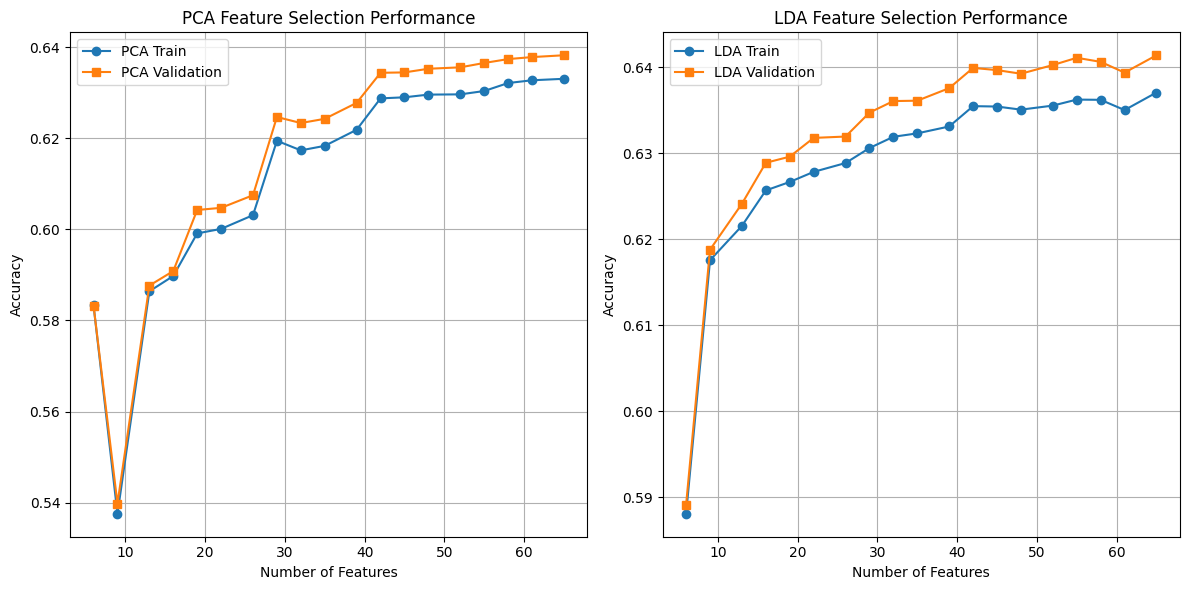

In [51]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results['num_features'], results['train_acc_pca'], marker='o', label='PCA Train')
plt.plot(results['num_features'], results['test_acc_pca'], marker='s', label='PCA Validation')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('PCA Feature Selection Performance')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(results['num_features'], results['train_acc_lda'], marker='o', label='LDA Train')
plt.plot(results['num_features'], results['test_acc_lda'], marker='s', label='LDA Validation')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('LDA Feature Selection Performance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [54]:
num_features = 28
pca = PCA(n_components=num_features)
pca.fit(X_train)

# Store number of components for this ratio
results['ratio'].append(ratio)
results['num_features'].append(num_features)

# Get PCA feature importance
pca_importance = np.sum(np.abs(pca.components_), axis=0)
pca_features = X_train.columns[np.argsort(pca_importance)[-num_features:]]
print(f"PCA - Top {num_features} features: {pca_features.tolist()}")

# Fit LDA and get feature importance
lda = LDA()
lda.fit(X_train, y_train)
lda_importance = np.abs(lda.coef_[0])
lda_features = X_train.columns[np.argsort(lda_importance)[-num_features:]]
print(f"LDA - Top {num_features} features: {lda_features.tolist()}")

PCA - Top 28 features: ['Census_FirmwareManufacturerIdentifier', 'EngineVersion', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_TotalPhysicalRAM', 'aspect_ratio', 'Firewall', 'Census_OSInstallTypeName', 'Census_GenuineStateName', 'Census_ProcessorCoreCount', 'Census_PrimaryDiskTypeName', 'primary_drive_c_ratio', 'Processor', 'Census_SystemVolumeTotalCapacity', 'Census_IsVirtualDevice', 'Screen_Area', 'SmartScreen', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Wdft_IsGamer', 'OrganizationIdentifier', 'IsProtected', 'AvSigVersion', 'Wdft_RegionIdentifier', 'AVProductsEnabled', 'DefaultBrowsersIdentifier', 'CityIdentifier', 'Census_ProcessorModelIdentifier', 'Census_HasOpticalDiskDrive']
LDA - Top 28 features: ['OsPlatformSubRelease', 'Census_TotalPhysicalRAM', 'Census_PowerPlatformRoleName', 'magic_4', 'Census_OSUILocaleIdentifier', 'Census_HasOpticalDiskDrive', 'DefaultBrowsersIdentifier', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_OSBranch'